# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Add path to local project source code
import sys
sys.path.append('../src')

from utils import inspect_datasets

# Explore

## Taraslia et al, 2013

### Environment setup

In [2]:
TARASLIA_ALL_PATH = '../data/taraslia/all.xls'
TARASLIA_OLFACTORY_BULB_PATH = '../data/taraslia/olfactory_bulb.xls'
TARASLIA_HIPPOCAMPUS_PATH = '../data/taraslia/hippocampus.xls'
TARASLIA_MIDBRAIN_PATH = '../data/taraslia/midbrain.xls'
TARASLIA_MEDULLA_PATH = '../data/taraslia/medulla.xls'
TARASLIA_CEREBELLUM_PATH = '../data/taraslia/cerebellum.xls'
TARASLIA_HYPPOTHALAMUS_PATH = '../data/taraslia/hypothalamus.xls'
TARASLIA_CORTEX_PATH = '../data/taraslia/cortex.xls'

taraslia_file_paths = [
    TARASLIA_ALL_PATH, TARASLIA_OLFACTORY_BULB_PATH, TARASLIA_HIPPOCAMPUS_PATH, TARASLIA_MIDBRAIN_PATH,
    TARASLIA_MEDULLA_PATH, TARASLIA_CEREBELLUM_PATH, TARASLIA_HYPPOTHALAMUS_PATH, TARASLIA_CORTEX_PATH
]

In [3]:
df_all = pd.read_excel(TARASLIA_ALL_PATH, header=1) # all brain regions
df_ob = pd.read_excel(TARASLIA_OLFACTORY_BULB_PATH, header=1)
df_hc = pd.read_excel(TARASLIA_HIPPOCAMPUS_PATH, header=1)
df_mb = pd.read_excel(TARASLIA_MIDBRAIN_PATH, header=1)
df_md = pd.read_excel(TARASLIA_MEDULLA_PATH, header=1)
df_cb = pd.read_excel(TARASLIA_CEREBELLUM_PATH, header=1)
df_ht = pd.read_excel(TARASLIA_HYPPOTHALAMUS_PATH, header=1)
df_cc = pd.read_excel(TARASLIA_CORTEX_PATH, header=1)

taraslia_dfs_dict = {
    "All Brain Regions (Table I)": df_all,
    "Olfactory Bulb (Table II)": df_ob,
    "Hippocampus (Table III)": df_hc,
    "Midbrain (Table IV)": df_mb,
    "Medulla (Table V)": df_md,
    "Cerebellum (Table VI)": df_cb,
    "Hypothalamus (Table VII)": df_ht,
    "Cerebral Cortex (Table VIII)": df_cc
}

### Inspect data

In [4]:
for path in taraslia_file_paths:
    # header=None prevents pandas from setting the first row as column headers
    df_info = pd.read_excel(path, nrows=1, header=None)
    
    # Extract the table title from the first cell
    table_title = df_info.iloc[0, 0]
    
    # Get the file name from the path
    file_name = path.split('/')[-1]
    
    print(f"{file_name}: {table_title}")

all.xls: Table I. Proteins identified in the nornal mouse brain parts.
olfactory_bulb.xls: Table II. Proteins identified only in olfactory bulb
hippocampus.xls: Table III. Proteins identified only in hippocampus 
midbrain.xls: Table IV. Proteins identified only in midbrain 
medulla.xls: Table V. Proteins identified only in medulla 
cerebellum.xls: Table VI. Proteins identified only in cerebellum 
hypothalamus.xls: Table VII. Proteins identified only in hypothalamus 
cortex.xls: Table VIII. Proteins identified only in cortex


The Excel files contain a descriptive title in the first row. Here we extract the metadata and confirm what biological data each file contains before loading the full datasets.

In [5]:
inspect_datasets(taraslia_dfs_dict)


==================== All Brain Regions (Table I) ====================
Shape: 515 rows × 7 columns


,Accession Name,Protein name,Protein MW,pI-Value,Brain part,Subcellular localisation,Function
0,1433B_MOUSE,14-3-3 protein beta/alpha,28183,4.62,"OB, HT, MD",Cytoplasm,"Transcription rergulation, cytoplasmic sequest..."
1,1433E_MOUSE,14-3-3 protein epsilon,29326,4.50,"OB, MB, HT, HC, CB, MD",Cytoplasm,"Cerebral cortex development, hippocampus devel..."
2,1433F_MOUSE,14-3-3 protein eta,28365,4.66,OB,Cytoplasm,"Glucocorticoid catabolism, glucocorticoid rece..."



Missing values per column:


,Missing Count,Missing %
Subcellular localisation,19,3.69


Duplicate rows: 0
------------------------------------------------------------

==================== Olfactory Bulb (Table II) ====================
Shape: 54 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,1433F_MOUSE,14-3-3 protein eta,64,40,28365,4.66
1,3HIDH_MOUSE,"3-hydroxyisobutyrate dehydrogenase, mitochondr...",112,40,35816,9.30
2,ACTBL_MOUSE,Beta-actin-like protein 2,58,22,42319,5.19


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Hippocampus (Table III) ====================
Shape: 62 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,AHSA1_MOUSE,Activator of 90 kDa heat shock protein ATPase ...,117,47,38321,5.3
1,AIP_MOUSE,AH receptor-interacting protein,65,25,38037,6.0
2,AMRP_MOUSE,Alpha-2-macroglobulin receptor-associated protein,135,38,42189,7.9


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Midbrain (Table IV) ====================
Shape: 9 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,6PGL_MOUSE,6-phosphogluconolactonase,69,43,27465,5.5
1,AT1A3_MOUSE,Sodium/potassium-transporting ATPase subunit a...,76,13,113045,5.1
2,CX4NB_MOUSE,Neighbor of COX4,56,30,23790,5.7


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Medulla (Table V) ====================
Shape: 10 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,AATM_MOUSE,"Aspartate aminotransferase, mitochondrial",96,26,47780,9.80
1,CNN1_MOUSE,Calponin-1,55,33,33506,9.60
2,DDX3L_MOUSE,Putative ATP-dependent RNA helicase Pl10,81,25,73494,6.82


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Cerebellum (Table VI) ====================
Shape: 5 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,4EBP2_MOUSE,Eukaryotic translation initiation factor 4E-bi...,55,80,13004,6.10
1,CB070_MOUSE,UPF0573 protein C2orf70 homolog,57,43,23113,10.06
2,CYC_MOUSE,"Cytochrome c, somatic",55,39,11712,10.19


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Hypothalamus (Table VII) ====================
Shape: 8 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,FBX16_MOUSE,F-box only protein 16,55,35,39362,10.64
1,K1C15_MOUSE,"Keratin, type I cytoskeletal 15",56,25,49278,4.60
2,LAP2B_MOUSE,"Lamina-associated polypeptide 2, isoforms beta...",60,27,50378,9.90


No missing values found.
Duplicate rows: 0
------------------------------------------------------------

==================== Cerebral Cortex (Table VIII) ====================
Shape: 36 rows × 6 columns


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
0,ABD12_MOUSE,Monoacylglycerol lipase ABHD12,87,32,45640,9.60
1,AL9A1_MOUSE,4-trimethylaminobutyraldehyde dehydrogenase,82,31,54449,6.77
2,ARK72_MOUSE,Aflatoxin B1 aldehyde reductase member 2,124,48,41028,9.30


No missing values found.
Duplicate rows: 0
------------------------------------------------------------


The **Subcellular localisation** column is descriptive for protein function and does not seem to contain any identifiers. Therefore, these missing values will not interfere with the correlation analysis between brain regions.

- **Table I:** This dataset serves as the primary source for identifying **common proteins**. The `Brain part` column contains comma-separated values (e.g., `OB, HT, MD`), which indicates that a single protein was identified across multiple regions. It also provides biological metadata like function and subcellular localisation.
- **Tables II–VIII:** These datasets are **subsets** of Table I. They contain proteins identified exclusively in one specific brain region. Unlike Table I, these tables provide technical quality metrics (`Mascot score` and `Coverage %`).

For the comparison with previous studies, we will cross-reference the `Accession Name` (e.g., `1433B_MOUSE`) from the current tables against the proteins identified in previous studies mentioned in the literature.

In [6]:
region_mapping = {
    "Olfactory Bulb (Table II)": "OB",
    "Hippocampus (Table III)": "HC",
    "Midbrain (Table IV)": "MB",
    "Medulla (Table V)": "MD",
    "Cerebellum (Table VI)": "CB",
    "Hypothalamus (Table VII)": "HT",
    "Cerebral Cortex (Table VIII)": "CC"
}

for title, df_region in taraslia_dfs_dict.items():
    # Skip table I
    if title == "All Brain Regions (Table I)":
        continue
        
    # Get the code (e.g., 'OB')
    code = region_mapping.get(title)
    
    if code:
        # Filter Table I:
        # We look for rows where 'Brain part' is EXACTLY the region code.
        # This confirms the protein is unique to that region (not shared).
        # .str.strip() removes any accidental spaces in the excel data
        master_subset = df_all[df_all['Brain part'].astype(str).str.strip() == code]
        
        count_master = len(master_subset)
        count_file = len(df_region)
        
        # Check if they match
        status = "✅ OK" if count_master == count_file else "❌ MISMATCH"

        print(f"   Count in {title}: {count_file}")
        print(f"   Count in Table I: {count_master} (filtered for '{code}' only)")
        print(f"   Status: {status}")
        print("\n")

   Count in Olfactory Bulb (Table II): 54
   Count in Table I: 52 (filtered for 'OB' only)
   Status: ❌ MISMATCH


   Count in Hippocampus (Table III): 62
   Count in Table I: 63 (filtered for 'HC' only)
   Status: ❌ MISMATCH


   Count in Midbrain (Table IV): 9
   Count in Table I: 8 (filtered for 'MB' only)
   Status: ❌ MISMATCH


   Count in Medulla (Table V): 10
   Count in Table I: 10 (filtered for 'MD' only)
   Status: ✅ OK


   Count in Cerebellum (Table VI): 5
   Count in Table I: 5 (filtered for 'CB' only)
   Status: ✅ OK


   Count in Hypothalamus (Table VII): 8
   Count in Table I: 8 (filtered for 'HT' only)
   Status: ✅ OK


   Count in Cerebral Cortex (Table VIII): 36
   Count in Table I: 35 (filtered for 'CC' only)
   Status: ❌ MISMATCH




A programmatic cross-verification was performed to compare the 'unique' proteins listed in the region-specific files (Tables II–VIII) against the 'all' dataset (Table I). While the datasets are largely consistent, minor discrepancies were observed, likely due to formatting artifacts (e.g., hidden whitespace in Excel cells) or minor labeling inconsistencies in the aggregate file.

# Correlation

In [7]:
# Create a dictionary of sets from the dataframes
# Note: we use 'Accession Name' as the unique identifier for each protein
protein_sets = {
    "OB": set(df_ob['Accession Name']),
    "HC": set(df_hc['Accession Name']),
    "MB": set(df_mb['Accession Name']),
    "MD": set(df_md['Accession Name']),
    "CB": set(df_cb['Accession Name']),
    "HT": set(df_ht['Accession Name']),
    "CC": set(df_cc['Accession Name'])
}

regions = list(protein_sets.keys())
matrix = pd.DataFrame(index=regions, columns=regions)

In [8]:
for r1 in regions:
    for r2 in regions:
        # Set intersection (&) finds proteins present in BOTH sets
        common_count = len(protein_sets[r1] & protein_sets[r2])
        matrix.loc[r1, r2] = common_count

print("Intersection Matrix (number of shared proteins):")
display(matrix)
# Convert the matrix dtypes from 'object' to 'int'
matrix = matrix.astype(int)

Intersection Matrix (number of shared proteins):


,OB,HC,MB,MD,CB,HT,CC
OB,54,0,0,0,0,0,0
HC,0,62,0,0,0,0,0
MB,0,0,9,1,0,0,0
MD,0,0,1,10,0,0,0
CB,0,0,0,0,5,0,0
HT,0,0,0,0,0,8,0
CC,0,0,0,0,0,0,36


In [9]:
# Convert the Accession Name columns into sets
set_mb = set(df_mb['Accession Name'])
set_md = set(df_md['Accession Name'])

# Find the intersection (the common protein)
shared_accession = set_mb.intersection(set_md)

# Filter the original dataframe to see the protein details
# We use list(shared_accession)[0] to get the string value out of the set
shared_protein_info = df_mb[df_mb['Accession Name'].isin(shared_accession)]

print(f"The shared protein is: {shared_accession}")
display(shared_protein_info)

The shared protein is: {'SEP10_MOUSE'}


,Accession Name,Protein name,Mascot Score,Coverage (%),Protein MW (Da),pI-Value
6,SEP10_MOUSE,Septin-10,78,52,53186,6.17


The Intersection Matrix confirms that **Tables II-VIII** represent highly specific proteomic signatures. The fact that the diagonal values match the file row counts (e.g., 54 unique proteins for OB) and the off-diagonal values are almost entirely zero indicates that these tables contain proteins identified exclusively in those regions.

**Unique (Different) Proteins per Region:** <br>
The analysis confirms significant regional specialization. The number of proteins identified exclusively in each region is:
* Hippocampus (HC): 62 
* Olfactory Bulb (OB): 54
* Cerebral Cortex (CC): 36
* Medulla (MD): 10
* Midbrain (MB): 9
* Hypothalamus (HT): 8
* Cerebellum (CB): 5

**Common (Shared) Proteins:** <br>
* **Regional Overlap:** There is nearly zero overlap between the specific lists (Tables II-VIII), with the only intersection being **1 protein shared between the Midbrain and Medulla**.
* **Overall Connectivity:** Broadly shared proteins are listed in Table I, where identifiers like `1433E_MOUSE` are found in almost all brain parts (OB, MB, HT, HC, CB, MD), representing the "core" proteome of the mouse brain.

To identify **common proteins**, we must refer to **Table I**, where the `Brain part` column explicitly lists multiple regional overlaps for shared proteins (e.g., `OB, MB, HT, HC, CB, MD`).

In [10]:
# Define the mapping of abbreviations to full names
region_mapping = {
    "OB": "Olfactory Bulb",
    "HC": "Hippocampus",
    "MB": "Midbrain",
    "MD": "Medulla",
    "CB": "Cerebellum",
    "HT": "Hypothalamus",
    "CC": "Cerebral Cortex"
}

matrix.index = matrix.index.map(region_mapping)
matrix.columns = matrix.columns.map(region_mapping)

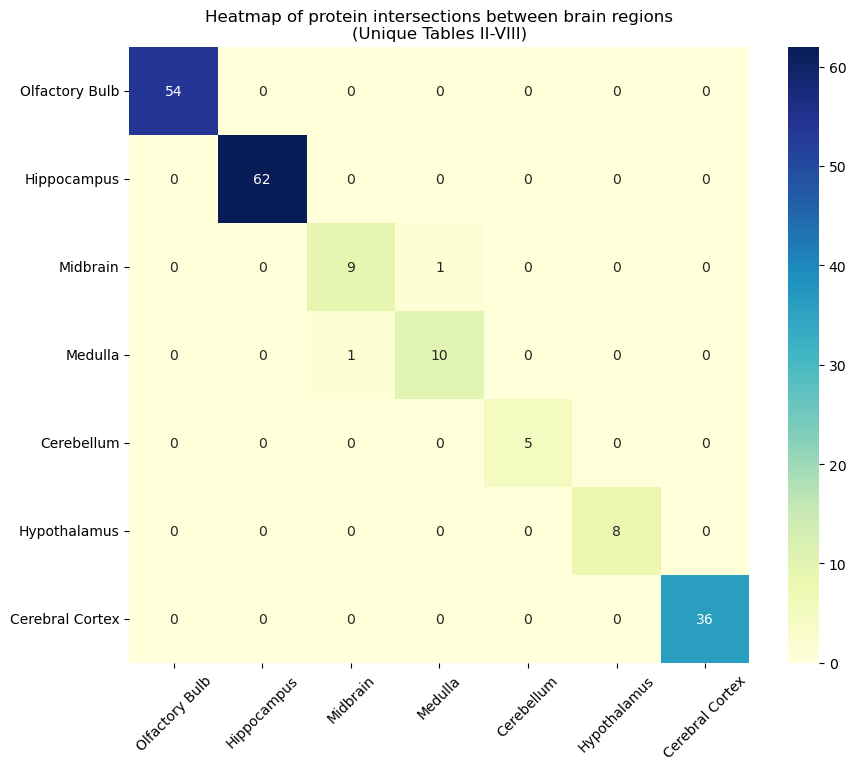

In [11]:
# Create a heatmap of the intersection matrix
plt.figure(figsize=(10, 8))
# annot=True puts the numbers in the boxes; cmap="YlGnBu" gives a nice blue/green look
sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.xticks(rotation=45)
plt.title("Heatmap of protein intersections between brain regions\n(Unique Tables II-VIII)")
plt.show()

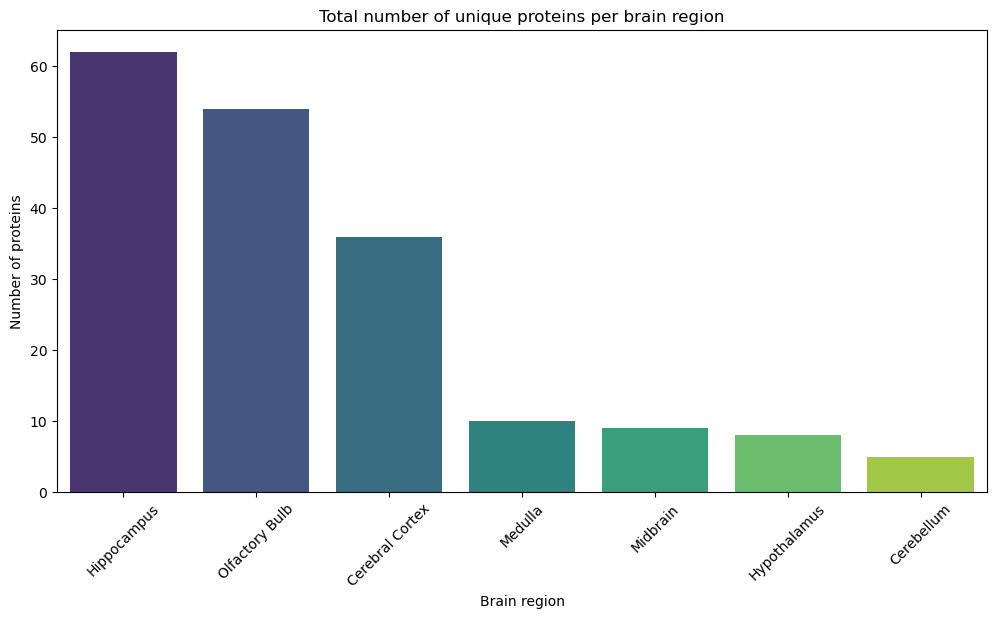

In [12]:
# Prepare the data
unique_counts = matrix.values.diagonal()
unique_series = pd.Series(unique_counts, index=matrix.index).sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))

sns.barplot(
    x=unique_series.index, 
    y=unique_series.values, 
    hue=unique_series.index, 
    palette="viridis", 
    legend=False
)

plt.title("Total number of unique proteins per brain region")
plt.ylabel("Number of proteins")
plt.xlabel("Brain region")
plt.xticks(rotation=45) # Rotate labels so they don't overlap
plt.show()

In [13]:
df_exploded = df_all.copy()
# Split the string "OB, HT, MD" into a list ['OB', 'HT', 'MD']
df_exploded['Brain part'] = df_exploded['Brain part'].str.split(', ')
# Turn those lists into separate rows
df_exploded = df_exploded.explode('Brain part')

# Find common proteins - Count how many regions each protein appears in
protein_counts = df_all['Brain part'].str.split(', ').str.len()

# Proteins common to ALL regions (7 regions in total)
common_to_all = df_all[protein_counts == 7]

# Proteins common to MULTIPLE regions (more than 1)
common_proteins = df_all[protein_counts > 1]

n_total_proteins = len(df_all)
n_common_all_regions = len(common_to_all)
n_common_multiple_regions = len(common_proteins)

print(f"Total proteins identified: {n_total_proteins}")
# Using :.1% for one decimal place
print(f"Proteins common to all 7 regions: {n_common_all_regions} ({n_common_all_regions/n_total_proteins:.1%})")
print(f"Proteins common to multiple regions: {n_common_multiple_regions} ({n_common_multiple_regions/n_total_proteins:.1%})")

display(common_to_all[['Accession Name', 'Protein name', 'Brain part']].head(3))

Total proteins identified: 515
Proteins common to all 7 regions: 41 (8.0%)
Proteins common to multiple regions: 334 (64.9%)


,Accession Name,Protein name,Brain part
3,1433G_MOUSE,14-3-3 protein gamma,"OB, CC, MB, HT, HC, CB, MD"
5,1433Z_MOUSE,14-3-3 protein zeta/delta,"ΟΒ, CC, MB, HT, HC, CB, MD"
13,ACON_MOUSE,"Aconitate hydratase, mitochondrial","OB, CC, MB, HT, HC, CB, MD"


Core Proteome (Universal): 41 proteins (8% of the total) are ubiquitous, appearing in every part of the mouse brain.

Shared Proteome (Common): 334 proteins (approx. 65%) are shared between at least two regions. These represent the functional overlaps between different brain parts.

Specific Proteome (Unique within Table I): By subtracting 334 from 515, we find that 181 proteins in Table I were identified in only one region.

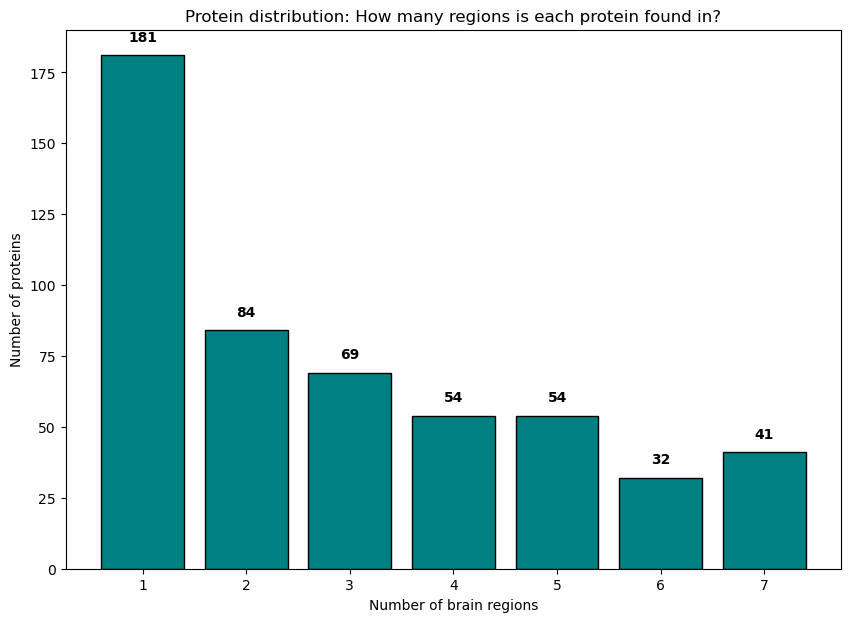

In [14]:
# Calculate the distribution of counts
# (How many proteins are in 1 region, 2 regions, etc.)
distribution = df_all['Brain part'].str.split(', ').str.len().value_counts().sort_index()

plt.figure(figsize=(10, 7))
plt.bar(distribution.index, distribution.values, color='teal', edgecolor='black')

plt.title("Protein distribution: How many regions is each protein found in?")
plt.xlabel("Number of brain regions")
plt.ylabel("Number of proteins")

# Add text labels on top of bars
for i, v in enumerate(distribution.values):
    plt.text(distribution.index[i], v + 5, str(v), ha='center', fontweight='bold')

plt.show()

In [15]:
UNIPROT_PATH = '../data/uniprot_mouse_brain.tsv'

# Load the data - sep='\t' is essential for TSV files
df_uniprot = pd.read_csv(UNIPROT_PATH, sep='\t')

print(f"UniProt reference data loaded: {len(df_uniprot)} proteins")
df_uniprot.head(3)

UniProt reference data loaded: 8382 proteins


,Entry,Entry Name,Protein names,Gene Ontology IDs
0,Q9WV92,E41L3_MOUSE,Band 4.1-like protein 3 (4.1B) (Differentially...,GO:0002175; GO:0003779; GO:0005200; GO:0005829...
1,Q99P72,RTN4_MOUSE,Reticulon-4 (Neurite outgrowth inhibitor) (Nog...,GO:0001825; GO:0002523; GO:0005635; GO:0005783...
2,B1AZP2,DLGP4_MOUSE,Disks large-associated protein 4 (DAP-4) (PSD-...,GO:0016020; GO:0023052; GO:0031594; GO:0045202...


In [16]:
# Entry Name is the "Accession Name" in the local data
protein_row = df_uniprot[df_uniprot["Entry Name"] == "1433B_MOUSE"]
display(protein_row)

,Entry,Entry Name,Protein names,Gene Ontology IDs
4847,Q9CQV8,1433B_MOUSE,14-3-3 protein beta/alpha (Protein kinase C in...,GO:0004860; GO:0004864; GO:0005634; GO:0005829...


## Korovesi et al, 2020

### Environment setup

In [17]:
KOROVESI_OLFACTORY_BULB_PATH = '../data/korovesi/olfactory_balb.xlsx'
KOROVESI_HIPPOCAMPUS_PATH = '../data/korovesi/hipocampus.xlsx'
KOROVESI_MIDBRAIN_PATH = '../data/korovesi/midbrain.xlsx'
KOROVESI_MEDULLA_PATH = '../data/korovesi/medulla.xlsx'
KOROVESI_CEREBELLUM_PATH = '../data/korovesi/cerebellum.xlsx'
KOROVESI_HYPPOTHALAMUS_PATH = '../data/korovesi/hipothalamus.xlsx'
KOROVESI_CORTEX_PATH = '../data/korovesi/cortex.xlsx'

korovesi_file_paths = [
    KOROVESI_OLFACTORY_BULB_PATH, KOROVESI_HIPPOCAMPUS_PATH, KOROVESI_MIDBRAIN_PATH,
    KOROVESI_MEDULLA_PATH, KOROVESI_CEREBELLUM_PATH, KOROVESI_HYPPOTHALAMUS_PATH, KOROVESI_CORTEX_PATH
]

In [18]:
kor_df_ob = pd.read_excel(KOROVESI_OLFACTORY_BULB_PATH)
kor_df_hc = pd.read_excel(KOROVESI_HIPPOCAMPUS_PATH)
kor_df_mb = pd.read_excel(KOROVESI_MIDBRAIN_PATH)
kor_df_md = pd.read_excel(KOROVESI_MEDULLA_PATH)
kor_df_cb = pd.read_excel(KOROVESI_CEREBELLUM_PATH)
kor_df_ht = pd.read_excel(KOROVESI_HYPPOTHALAMUS_PATH)
kor_df_cc = pd.read_excel(KOROVESI_CORTEX_PATH)

korovesi_dfs_dict = {
    "Olfactory Bulb": kor_df_ob,
    "Hippocampus": kor_df_hc,
    "Midbrain": kor_df_mb,
    "Medulla": kor_df_md,
    "Cerebellum": kor_df_cb,
    "Hypothalamus": kor_df_ht,
    "Cerebral Cortex": kor_df_cc
}

### Inspect data

In [19]:
inspect_datasets(korovesi_dfs_dict)


==================== Olfactory Bulb ====================
Shape: 2311 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",167.199201,39.64,1,73,73,267,2.052619e+09,2472,284.422297,5.325684
1,P01942,Hemoglobin subunit alpha OS=Mus musculus GN=Hb...,97.368920,25.35,1,3,3,58,8.179751e+09,142,15.075761,8.221191
2,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,77.663826,32.87,2,17,24,165,7.478767e+09,1013,111.619932,5.414551



Missing values per column:


,Missing Count,Missing %
Area,192,8.31


Duplicate rows: 0
------------------------------------------------------------

==================== Hippocampus ====================
Shape: 2246 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",191.915079,42.31,2,81,81,227,2.265693e+09,2472,284.422297,5.325684
1,P60710,"Actin, cytoplasmic 1 OS=Mus musculus GN=Actb P...",88.966023,41.07,2,4,13,135,7.399753e+09,375,41.709732,5.478027
2,P63268,"Actin, gamma-enteric smooth muscle OS=Mus musc...",84.994816,29.52,4,2,10,92,4.758188e+09,376,41.849791,5.478027



Missing values per column:


,Missing Count,Missing %
Area,130,5.79


Duplicate rows: 0
------------------------------------------------------------

==================== Midbrain ====================
Shape: 2250 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,329.138484,30.40,10,12,24,114,1.806510e+09,1013,111.619932,5.414551
1,A3KGU5,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",297.171618,37.40,12,1,65,130,1.255898e+08,2457,282.720450,5.325684
2,A3KGU7,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",296.427158,37.02,14,1,65,130,1.255898e+08,2477,284.976676,5.338379



Missing values per column:


,Missing Count,Missing %
Area,178,7.91


Duplicate rows: 0
------------------------------------------------------------

==================== Medulla ====================
Shape: 2391 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",192.678235,42.76,1,87,88,245,2.256907e+09,2472,284.422297,5.325684
1,P08553,Neurofilament medium polypeptide OS=Mus muscul...,94.142858,38.44,1,28,28,168,2.633121e+09,848,95.858595,4.767090
2,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,66.442199,26.65,3,14,20,194,1.039373e+10,1013,111.619932,5.414551



Missing values per column:


,Missing Count,Missing %
Area,175,7.32


Duplicate rows: 0
------------------------------------------------------------

==================== Cerebellum ====================
Shape: 2334 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",656.608884,42.64,1,80,81,256,2.904653e+08,2472,284.422297,5.325684
1,Q04447,Creatine kinase B-type OS=Mus musculus GN=Ckb ...,299.488654,50.39,1,15,15,112,8.276152e+08,381,42.686280,5.668457
2,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,270.776774,28.83,3,13,21,106,1.501888e+09,1013,111.619932,5.414551



Missing values per column:


,Missing Count,Missing %
Area,193,8.27


Duplicate rows: 0
------------------------------------------------------------

==================== Hypothalamus ====================
Shape: 2247 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",155.247064,35.84,1,70,70,217,1.083412e+09,2472,284.422297,5.325684
1,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,154.370902,32.97,3,15,27,247,1.002156e+10,1013,111.619932,5.414551
2,Q6PIE5,Sodium/potassium-transporting ATPase subunit a...,98.597718,34.41,3,17,28,147,6.769849e+09,1020,112.145477,5.554199



Missing values per column:


,Missing Count,Missing %
Area,207,9.21


Duplicate rows: 0
------------------------------------------------------------

==================== Cerebral Cortex ====================
Shape: 2795 rows × 12 columns


,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",1033.115718,42.96,2,80,80,308,1.534083e+09,2472,284.422297,5.325684
1,Q60932,Voltage-dependent anion-selective channel prot...,500.948720,49.32,1,11,12,191,2.665349e+09,296,32.331378,8.426270
2,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,478.390221,28.53,2,13,21,151,6.228773e+09,1013,111.619932,5.414551



Missing values per column:


,Missing Count,Missing %
Area,338,12.09


Duplicate rows: 0
------------------------------------------------------------


In [21]:
KOROVESI_SUP_DAT_PATH = '../data/korovesi/supplementary_table.xlsx'
kor_df_sup = pd.read_excel(KOROVESI_CORTEX_PATH)
kor_df_sup.head(3)

,Accession,Description,Score,Coverage,# Proteins,# Unique Peptides,# Peptides,# PSMs,Area,# AAs,MW [kDa],calc. pI
0,P16546,"Spectrin alpha chain, non-erythrocytic 1 OS=Mu...",1033.115718,42.96,2,80,80,308,1.534083e+09,2472,284.422297,5.325684
1,Q60932,Voltage-dependent anion-selective channel prot...,500.948720,49.32,1,11,12,191,2.665349e+09,296,32.331378,8.426270
2,Q6PIC6,Sodium/potassium-transporting ATPase subunit a...,478.390221,28.53,2,13,21,151,6.228773e+09,1013,111.619932,5.414551
